# Unit Tests

In [1]:
BUILD_DIR="../build/"
!echo $BUILD_DIR

PYTHON_SCRIPT_DIR="../scripts/python/landmark_tools/"
!echo $PYTHON_SCRIPT_DIR

../build/
../scripts/python/landmark_tools/


In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

# This sys call is needed because the file is in another directory 
import sys
sys.path.insert(1, '../scripts/python/landmark_tools')
import visualize_corr
import landmark

plt.rcParams['figure.figsize'] = [8, 3]

In [3]:
!$BUILD_DIR/landmark_2_point \
-landmark gold_standard_data/equal_rectangular_WY.lmk \
-ply output/equal_rectangular_WY.ply \
-frame LOCAL

!python $PYTHON_SCRIPT_DIR/render_ply.py \
    output/equal_rectangular_WY.ply \
    30 120 \
    output/equal_rectangular_WY.png \
    -height 500 \
    -width 500 \
    -resolution 10

!$BUILD_DIR/add_srm \
  -input gold_standard_data/equal_rectangular_WY.lmk \
  -output output/equal_rectangular_WY_rendered.lmk \
  -srm output/equal_rectangular_WY.png

                 #! LVS Map v3.0
Landmark file saved at output/equal_rectangular_WY.ply
PLY import of 'equal_rectangular_WY.ply' took 126.99 ms
Fra:1 Mem:35.16M (Peak 35.16M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Synchronizing object | equal_rectangular_WY
Fra:1 Mem:73.68M (Peak 77.49M) | Time:00:00.01 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Initializing
Fra:1 Mem:73.54M (Peak 77.49M) | Time:00:00.01 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Waiting for render to start
Fra:1 Mem:73.55M (Peak 77.49M) | Time:00:00.01 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Loading render kernels (may take a few minutes the first time)
Fra:1 Mem:73.55M (Peak 77.49M) | Time:00:00.01 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Scene
Fra:1 Mem:73.55M (Peak 77.49M) | Time:00:00.01 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Shaders
Fra:1 Mem:73.63M (Peak 77.49M) | Time:00:00.01 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Procedurals
Fra:1 Mem:7

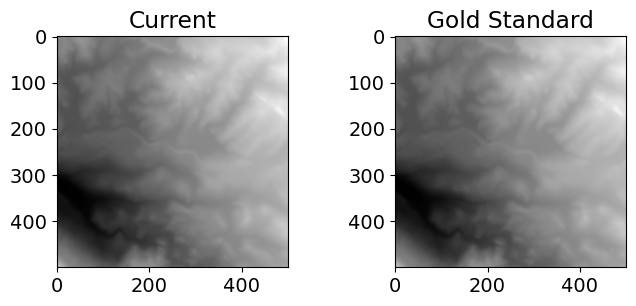

<Figure size 800x300 with 0 Axes>

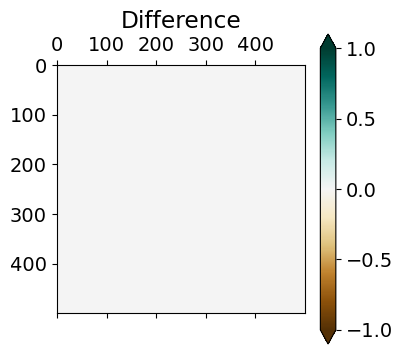

In [4]:
L1 = landmark.Landmark("output/equal_rectangular_WY_rendered.lmk")
plt.subplot(1,2,1)
plt.imshow(L1.ele, cmap='gray')
plt.title("Current")

gt = landmark.Landmark("gold_standard_data/equal_rectangular_WY.lmk_demo.lmk")
plt.subplot(1,2,2)
plt.imshow(gt.ele, cmap='gray')
plt.title("Gold Standard")

plt.show()

fig = plt.figure()
cax = plt.matshow(L1.ele-gt.ele, cmap='BrBG', vmin=-1, vmax=1)
cbar = fig.colorbar(cax, extend='both')
plt.title("Difference")
plt.show()

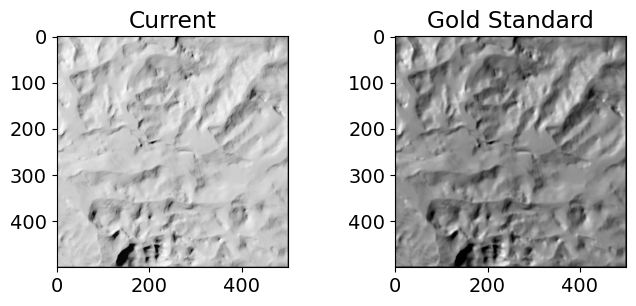

<Figure size 800x300 with 0 Axes>

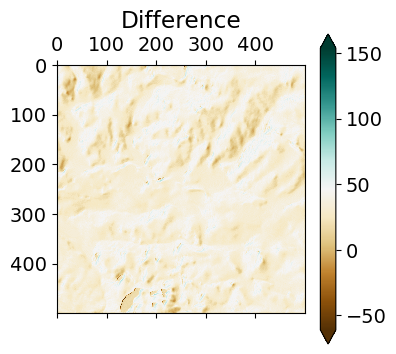

In [5]:
L1 = landmark.Landmark("output/equal_rectangular_WY_rendered.lmk")
plt.subplot(1,2,1)
plt.imshow(L1.srm, cmap='gray')
plt.title("Current")

gt = landmark.Landmark("gold_standard_data/equal_rectangular_WY.lmk_demo.lmk")
plt.subplot(1,2,2)
plt.imshow(gt.srm, cmap='gray')
plt.title("Gold Standard")

plt.show()

fig = plt.figure()
cax = plt.matshow(L1.srm-gt.srm, cmap='BrBG')
cbar = fig.colorbar(cax, extend='both')
plt.title("Difference")
plt.show()

## Translate

In [6]:
!$BUILD_DIR/distort_landmark -input gold_standard_data/equal_rectangular_WY.lmk_demo.lmk \
  -output output/translate_test1.lmk \
  -translate 20 30 50

!$BUILD_DIR/distort_landmark -input output/translate_test1.lmk \
  -output output/translate_test2.lmk \
  -translate -20 -30 -50

                 #! LVS Map v3.0
Translating landmark by (20.000000, 30.000000, 50.000000)...done.
Landmark file written to: output/translate_test1.lmk
                 #! LVS Map v3.0
Translating landmark by (-20.000000, -30.000000, -50.000000)...done.
Landmark file written to: output/translate_test2.lmk


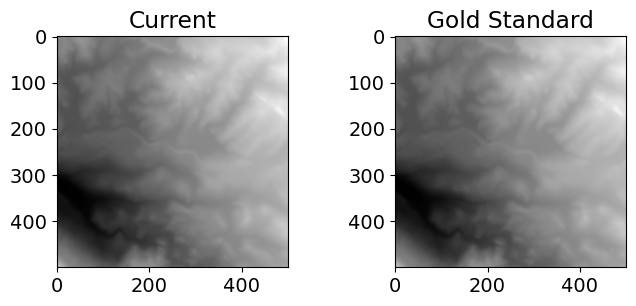

<Figure size 800x300 with 0 Axes>

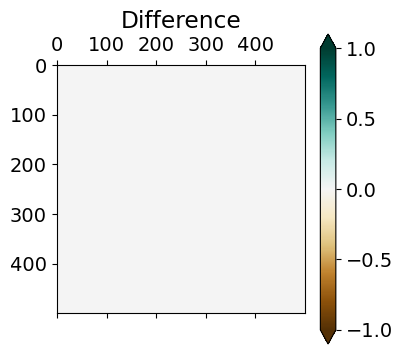

In [7]:
L1 = landmark.Landmark("output/translate_test1.lmk")
plt.subplot(1,2,1)
plt.imshow(L1.ele, cmap='gray')
plt.title("Current")

plt.subplot(1,2,2)
plt.imshow(gt.ele, cmap='gray')
plt.title("Gold Standard")

plt.show()

fig = plt.figure()
cax = plt.matshow(L1.ele-gt.ele, cmap='BrBG', vmin=-1, vmax=1)
cbar = fig.colorbar(cax, extend='both')
plt.title("Difference")
plt.show()

In [8]:
print(L1.anchor_point-gt.anchor_point)

[ 14.70910707 -19.90962321  56.45572666]


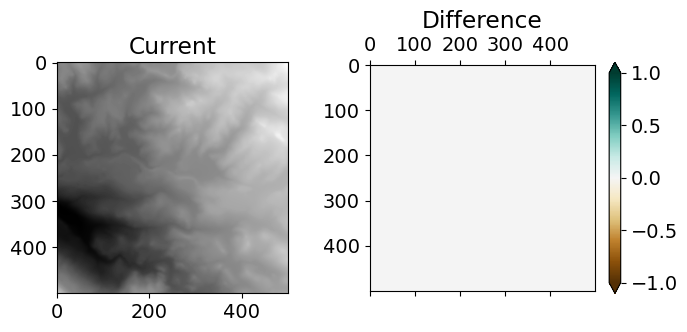

In [9]:
fig = plt.figure()

L2 = landmark.Landmark("output/translate_test2.lmk")
plt.subplot(1,2,1)
plt.imshow(L1.ele, cmap='gray')
plt.title("Current")

ax = plt.subplot(1,2,2)
cax = plt.matshow(L2.ele-gt.ele, cmap='BrBG', fignum=False, vmin=-1, vmax=1)
fig.colorbar(cax, extend='both')
plt.title("Difference")
plt.show()

In [10]:
print(L2==gt)

True


## Rotation

In [11]:
!$BUILD_DIR/distort_landmark -input gold_standard_data/equal_rectangular_WY.lmk_demo.lmk \
  -output output/rotate_test1.lmk \
  -rotate 15

!$BUILD_DIR/distort_landmark -input output/rotate_test1.lmk \
  -output output/rotate_test2.lmk \
  -rotate -15

!$BUILD_DIR/distort_landmark -input gold_standard_data/equal_rectangular_WY.lmk_demo.lmk \
  -output output/rotate_test2_degrees.lmk \
  -rotate 2

                 #! LVS Map v3.0
Rotating landmark in plane by 15.000000 degrees...done.
Landmark file written to: output/rotate_test1.lmk
                 #! LVS Map v3.0
Rotating landmark in plane by -15.000000 degrees...done.
Landmark file written to: output/rotate_test2.lmk
                 #! LVS Map v3.0
Rotating landmark in plane by 2.000000 degrees...done.
Landmark file written to: output/rotate_test2_degrees.lmk


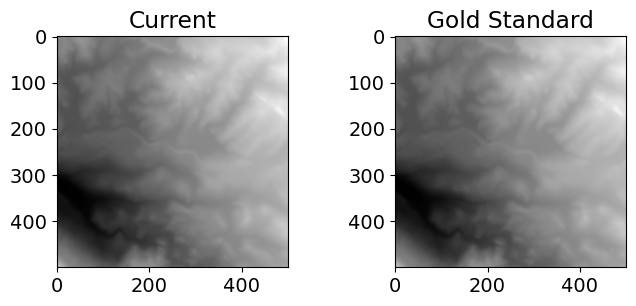

<Figure size 800x300 with 0 Axes>

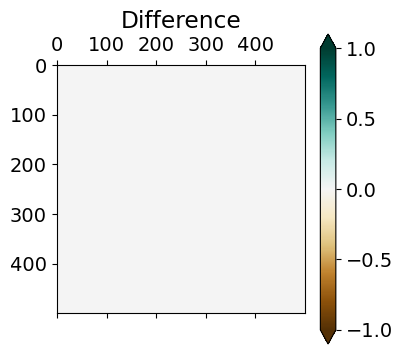

In [12]:
L1 = landmark.Landmark("output/rotate_test1.lmk")
plt.subplot(1,2,1)
plt.imshow(L1.ele, cmap='gray')
plt.title("Current")

plt.subplot(1,2,2)
plt.imshow(gt.ele, cmap='gray')
plt.title("Gold Standard")

plt.show()

fig = plt.figure()
cax = plt.matshow(L1.ele-gt.ele, cmap='BrBG', vmin=-1, vmax=1)
cbar = fig.colorbar(cax, extend='both')
plt.title("Difference")
plt.show()

In [13]:
print(L1 == gt)

L1.assess_equality(gt)

print(L1)
print(gt)

False
LMK_BODY 0
LMK_ID b'0\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
LMK_SIZE 500 500
LMK_RESOLUTION 10.0
LMK_ANCHOR_POINT -1365092.7414358496 -4345383.317688728 4453766.2846248355
LMK_ANCHOR_PIXEL 250.0 250.0
LMK_WORLD_2_MAP_ROT 0.8671058183541416 -0.4627177893812866 -0.18444442839347008
LMK_WORLD_2_MAP_ROT 0.45001104949527837 0.5689078401524963 0.6883559578780994
LMK_WORLD_2_MAP_ROT -0.2135826657513014 -0.6798794869697407 0.7015314163231254

LMK_BODY 0
LMK_ID b'0\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
LMK_SIZE 500 500
LMK_RESOLUTION 10.0
LMK_ANCHOR_POINT -1365092.7414358496 -4345383.317688728 4453766.2846248355
LMK_ANCHOR_PIXEL 250.0 250.0
LMK_WORLD_2_MAP_ROT 0.9540313357214817 -0.29970687423128234 0.0
LMK_WORLD_2_MAP_ROT 0.21025378796333952 0.6692829541646771 0.7126385282256845
LMK_WORLD_2_MAP_ROT -0.213582665751301

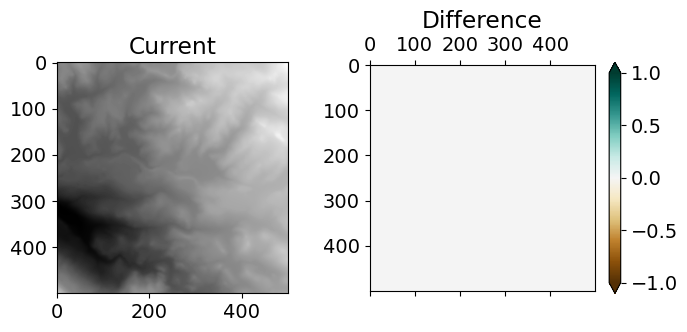

In [14]:
fig = plt.figure()

L2 = landmark.Landmark("output/rotate_test2.lmk")
plt.subplot(1,2,1)
plt.imshow(L1.ele, cmap='gray')
plt.title("Current")

ax = plt.subplot(1,2,2)
cax = plt.matshow(L2.ele-gt.ele, cmap='BrBG', fignum=False, vmin=-1, vmax=1)
fig.colorbar(cax, extend='both')
plt.title("Difference")
plt.show()

In [15]:
print(L2 == gt)

L2.assess_equality(gt)

print(L2)
print(gt)

False
LMK_BODY 0
LMK_ID b'0\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
LMK_SIZE 500 500
LMK_RESOLUTION 10.0
LMK_ANCHOR_POINT -1365092.7414358496 -4345383.317688728 4453766.2846248355
LMK_ANCHOR_PIXEL 250.0 250.0
LMK_WORLD_2_MAP_ROT 0.9540313357214817 -0.2997068742312824 -1.9455526332888713e-17
LMK_WORLD_2_MAP_ROT 0.21025378796333957 0.6692829541646771 0.7126385282256845
LMK_WORLD_2_MAP_ROT -0.2135826657513014 -0.6798794869697407 0.7015314163231254

LMK_BODY 0
LMK_ID b'0\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
LMK_SIZE 500 500
LMK_RESOLUTION 10.0
LMK_ANCHOR_POINT -1365092.7414358496 -4345383.317688728 4453766.2846248355
LMK_ANCHOR_PIXEL 250.0 250.0
LMK_WORLD_2_MAP_ROT 0.9540313357214817 -0.29970687423128234 0.0
LMK_WORLD_2_MAP_ROT 0.21025378796333952 0.6692829541646771 0.7126385282256845
LMK_WORLD_2_MAP_ROT -0.213582665751

## Random Displacement

In [16]:
!$BUILD_DIR/distort_landmark \
  -input gold_standard_data/equal_rectangular_WY.lmk_demo.lmk \
  -output output/random_test1.lmk \
  -random_displace 0 10

                 #! LVS Map v3.0
Applying random displacement to landmark with mu=0.000000, sigma=10.000000 ...done.
Landmark file written to: output/random_test1.lmk


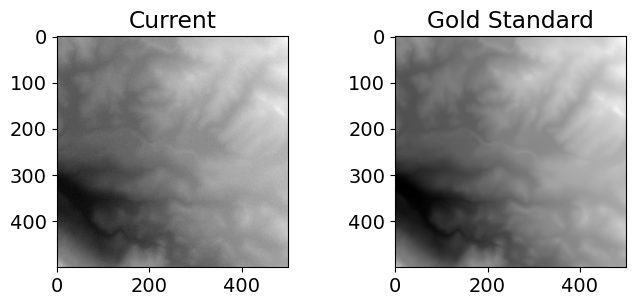

<Figure size 800x300 with 0 Axes>

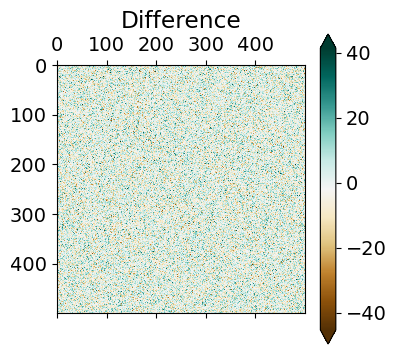

In [17]:
L1 = landmark.Landmark("output/random_test1.lmk")
plt.subplot(1,2,1)
plt.imshow(L1.ele, cmap='gray')
plt.title("Current")

plt.subplot(1,2,2)
plt.imshow(gt.ele, cmap='gray')
plt.title("Gold Standard")

plt.show()

fig = plt.figure()
cax = plt.matshow(L1.ele-gt.ele, cmap='BrBG')
cbar = fig.colorbar(cax, extend='both')
plt.title("Difference")
plt.show()

## Registration

If we move the lmk anchor point in header, can we reregister the landmark to the original and find the original anchor point?

In [18]:
!$BUILD_DIR/landmark_registration \
    -child output/translate_test1.lmk \
    -base gold_standard_data/equal_rectangular_WY.lmk_demo.lmk

No parameter file provided. Using defaults.
feature_match: 
  correlation_window_size: 25
  search_window_size: 36
  min_correlation: 0.300000
forstner_feature_detector: 
  min_dist_feature: 5.000000
  num_features: 600
  forstner_feature_window_size: 9
                 #! LVS Map v3.0
                 #! LVS Map v3.0
At feature i = 910 done length 9409
best feat for homography 320
# of RANSAC inliers 320
iter = 0
iter = 1
iter = 2
iter = 3
iter = 4
iter = 5
iter = 6
iter = 7
iter = 8
iter = 9
iter = 10
iter = 11
iter = 12
iter = 13
iter = 14
iter = 15
iter = 16
iter = 17
iter = 18
iter = 19
iter = 20
iter = 21
iter = 22
iter = 23
iter = 24
iter = 25
iter = 26
iter = 27
iter = 28
iter = 29
bestk 320
25.9992940272204578 -45.2016707435250282 -107.4987187515944242
 0.999999995735897 -0.000061378268827 -0.000068999369908
 0.000061380574953  0.999999997557737  0.000033420796446
 0.000068997318428 -0.000033425031525  0.999999997061068
 0.999999995735897 -0.000061378268827 -0.000068999369908


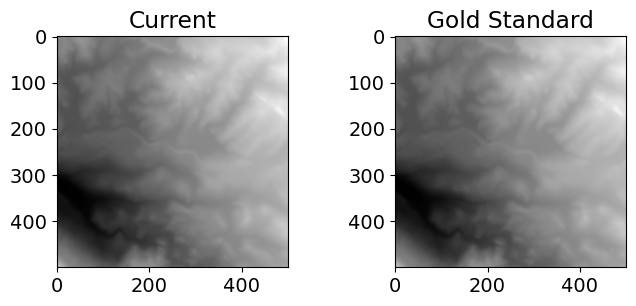

<Figure size 800x300 with 0 Axes>

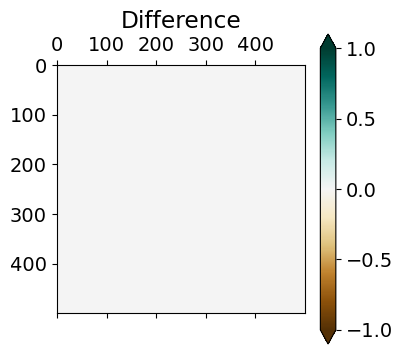

In [19]:
L1 = landmark.Landmark("output/translate_test1.lmk_registered.lmk")
plt.subplot(1,2,1)
plt.imshow(L1.ele, cmap='gray')
plt.title("Current")

plt.subplot(1,2,2)
plt.imshow(gt.ele, cmap='gray')
plt.title("Gold Standard")

plt.show()

fig = plt.figure()
cax = plt.matshow(L1.ele-gt.ele, cmap='BrBG', vmin=-1, vmax=1)
cbar = fig.colorbar(cax, extend='both')
plt.title("Difference")
plt.show()

In [20]:
print(L1 == gt)

L1.assess_equality(gt)

print(L1)
print(gt)

print(L1.anchor_point - gt.anchor_point)
print(L1.mapRworld - gt.mapRworld)

False
self.anchor_point != other.anchor_point
self.mapRworld != other.mapRworld
LMK_BODY 0
LMK_ID b'0\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
LMK_SIZE 500 500
LMK_RESOLUTION 10.0
LMK_ANCHOR_POINT -1365092.624849238 -4345383.357341334 4453766.2870594505
LMK_ANCHOR_PIXEL 250.0 250.0
LMK_WORLD_2_MAP_ROT 0.95404972714249 -0.2996483145074095 7.584331558070383e-05
LMK_WORLD_2_MAP_ROT 0.210163536028294 0.6693196749756948 0.7126306622750056
LMK_WORLD_2_MAP_ROT -0.21358934024033813 -0.6798691493974552 0.701539402623458

LMK_BODY 0
LMK_ID b'0\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
LMK_SIZE 500 500
LMK_RESOLUTION 10.0
LMK_ANCHOR_POINT -1365092.7414358496 -4345383.317688728 4453766.2846248355
LMK_ANCHOR_PIXEL 250.0 250.0
LMK_WORLD_2_MAP_ROT 0.9540313357214817 -0.29970687423128234 0.0
LMK_WORLD_2_MAP_ROT 0.21025378796333952 0.6692

## Landmark Comparison

What if a map is compared to itself? Should be zero deltas.

In [21]:
!$BUILD_DIR/landmark_comparison \
  -l2 gold_standard_data/equal_rectangular_WY.lmk_demo.lmk \
  -l1 gold_standard_data/equal_rectangular_WY.lmk_demo.lmk \
  -o output/self_compare

No parameter file provided. Using defaults.
feature_match: 
  correlation_window_size: 25
  search_window_size: 36
  min_correlation: 0.300000
forstner_feature_detector: 
  min_dist_feature: 5.000000
  num_features: 600
  forstner_feature_window_size: 9
                 #! LVS Map v3.0
                 #! LVS Map v3.0
line = 0
num_matched_features 2209
i = 0 j = 0
best feat for homography 2209
num_matched_features 2397
i = 0 j = 200
best feat for homography 2397
num_matched_features 1034
i = 0 j = 400
best feat for homography 1034
line = 200
num_matched_features 2397
i = 200 j = 0
best feat for homography 2397
num_matched_features 2601
i = 200 j = 200
best feat for homography 2601
num_matched_features 1126
i = 200 j = 400
best feat for homography 1126
line = 400
num_matched_features 1034
i = 400 j = 0
best feat for homography 1034
num_matched_features 1122
i = 400 j = 200
best feat for homography 1122
num_matched_features 485
i = 400 j = 400
best feat for homography 484
Saving results 

/Users/cmauceri/Workspace/LanderVisionSystem/github_landmark_tools/tests/../scripts/python/landmark_tools/visualize_corr.py:109: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


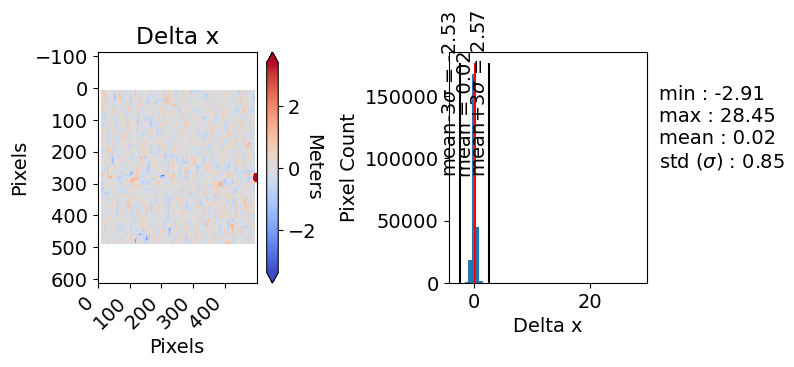

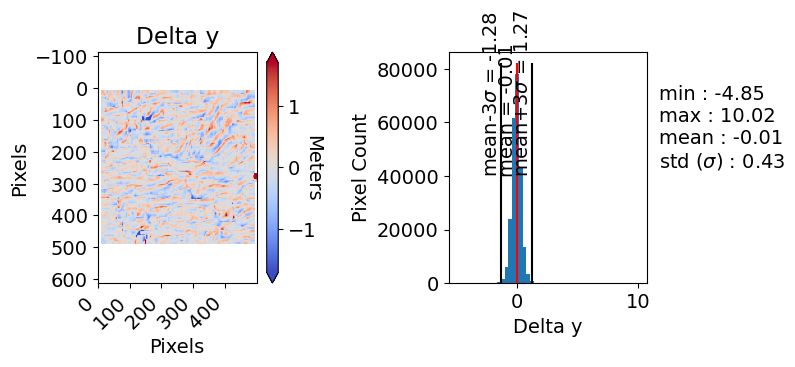

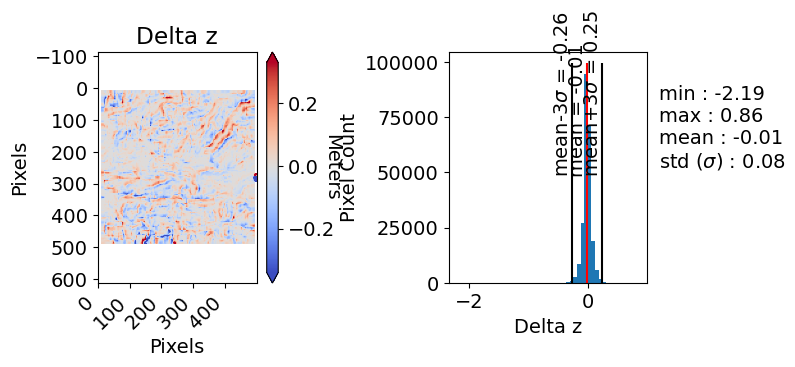

In [22]:
width = 500
height = 500
visualize_corr.displayAll("output/self_compare", width, height, "output/self_compare_")

## Crop 

Cropping a landmark will change the elevation values because the anchor point changes, but the structure should remain the same.

If we start with two rough crops, and then refine, we should end with the same map

In [23]:
!$BUILD_DIR/edit_landmark -input output/equal_rectangular_WY_rendered.lmk -output output/equal_rectangular_WY_rendered_cropped1.lmk -operation CROP -roi 150 150 200 200
!$BUILD_DIR/edit_landmark -input output/equal_rectangular_WY_rendered.lmk -output output/equal_rectangular_WY_rendered_cropped_rough.lmk -operation CROP -roi 50 50 400 400
!$BUILD_DIR/edit_landmark -input output/equal_rectangular_WY_rendered_cropped_rough.lmk -output output/equal_rectangular_WY_rendered_cropped2.lmk -operation CROP -roi 100 100 200 200

                 #! LVS Map v3.0
 0.954031335721568 -0.299706874231009  0.000000000000000
 0.210253787964589  0.669282954167783  0.712638528222399
-0.213582665750122 -0.679879486966667  0.701531416326463
Landmark file written to: output/equal_rectangular_WY_rendered_cropped1.lmk
                 #! LVS Map v3.0
 0.954031335721568 -0.299706874231009  0.000000000000000
 0.210253787964589  0.669282954167783  0.712638528222399
-0.213582665750122 -0.679879486966667  0.701531416326463
Landmark file written to: output/equal_rectangular_WY_rendered_cropped_rough.lmk
                 #! LVS Map v3.0
 0.954031335720521 -0.299706874234339  0.000000000000000
 0.210253787964071  0.669282954168182  0.712638528222178
-0.213582665752429 -0.679879486965711  0.701531416326688
Landmark file written to: output/equal_rectangular_WY_rendered_cropped2.lmk


In [24]:
L_org = landmark.Landmark("output/equal_rectangular_WY_rendered.lmk")
L_crop1 = landmark.Landmark("output/equal_rectangular_WY_rendered_cropped1.lmk")
L_crop2 = landmark.Landmark("output/equal_rectangular_WY_rendered_cropped2.lmk")

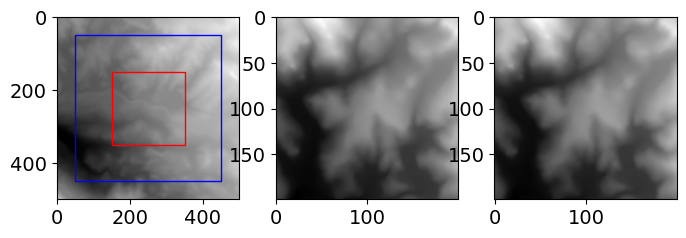

In [25]:
ax = plt.subplot(1,3,1)

# Display the image
ax.imshow(L_org.ele , cmap='gray')

# Create a Rectangle patch
rect = patches.Rectangle((150, 150), 200, 200, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

rect = patches.Rectangle((50, 50), 400, 400, linewidth=1, edgecolor='b', facecolor='none')
ax.add_patch(rect)

plt.subplot(1,3,2)
plt.imshow(L_crop2.ele, cmap='gray')

plt.subplot(1,3,3)
plt.imshow(L_crop1.ele, cmap='gray')

plt.show()

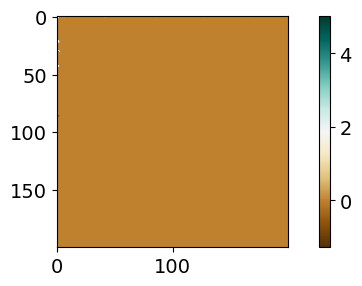

In [26]:
plt.figure()
plt.imshow(L_crop1.ele-L_crop2.ele, cmap='BrBG')
plt.colorbar()
plt.show()

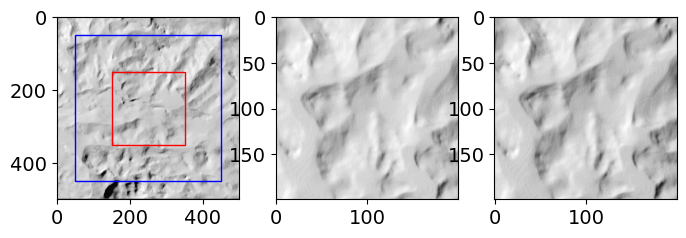

In [27]:
ax = plt.subplot(1,3,1)

# Display the image
ax.imshow(L_org.srm , cmap='gray')

# Create a Rectangle patch
rect = patches.Rectangle((150, 150), 200, 200, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

rect = patches.Rectangle((50, 50), 400, 400, linewidth=1, edgecolor='b', facecolor='none')
ax.add_patch(rect)

plt.subplot(1,3,2)
plt.imshow(L_crop2.srm, cmap='gray')

plt.subplot(1,3,3)
plt.imshow(L_crop1.srm, cmap='gray')

plt.show()

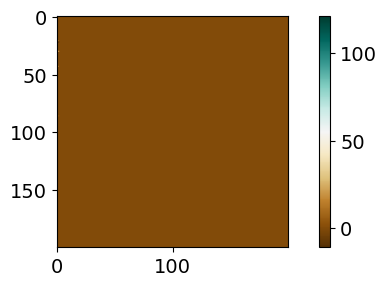

In [28]:
plt.figure()
plt.imshow(L_crop1.srm-L_crop2.srm, cmap='BrBG')
plt.colorbar()
plt.show()

## Subset 

Subsetting a landmark will not change the elevation values.

In [29]:
!$BUILD_DIR/edit_landmark -input output/equal_rectangular_WY_rendered.lmk -output output/equal_rectangular_WY_rendered_subset.lmk -operation SUBSET -roi 50 50 200 200

                 #! LVS Map v3.0
Landmark file written to: output/equal_rectangular_WY_rendered_subset.lmk


In [30]:
L_subset = landmark.Landmark("output/equal_rectangular_WY_rendered_subset.lmk")

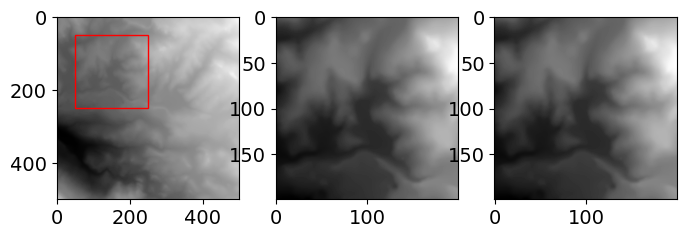

In [31]:
ax = plt.subplot(1,3,1)

# Display the image
ax.imshow(L_org.ele , cmap='gray')

# Create a Rectangle patch
rect = patches.Rectangle((50, 50), 200, 200, linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.subplot(1,3,2)
plt.imshow(L_org.ele[50:250,50:250], cmap='gray')

plt.subplot(1,3,3)
plt.imshow(L_subset.ele, cmap='gray')

plt.show()

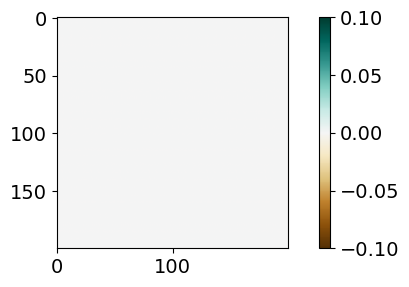

In [32]:
plt.figure()
plt.imshow(L_org.ele[50:250,50:250]-L_subset.ele, cmap='BrBG')
plt.colorbar()
plt.show()

## Rescale

By upscaling, then downscaling, we should return to the same map.

In [33]:
!$BUILD_DIR/edit_landmark -input output/equal_rectangular_WY_rendered.lmk -output output/equal_rectangular_WY_rendered_upsample.lmk -operation RESCALE -scale 0.5
!$BUILD_DIR/edit_landmark -input output/equal_rectangular_WY_rendered_upsample.lmk -output output/equal_rectangular_WY_rendered_downsample.lmk -operation RESCALE -scale 2

                 #! LVS Map v3.0
Landmark file written to: output/equal_rectangular_WY_rendered_upsample.lmk
                 #! LVS Map v3.0
Landmark file written to: output/equal_rectangular_WY_rendered_downsample.lmk


In [34]:
L_scale = landmark.Landmark("output/equal_rectangular_WY_rendered_downsample.lmk")

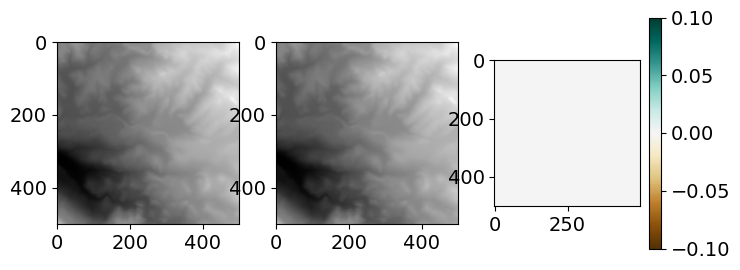

In [35]:
ax = plt.subplot(1,3,1)

# Display the image
ax.imshow(L_org.ele , cmap='gray')

plt.subplot(1,3,2)
plt.imshow(L_scale.ele, cmap='gray')

plt.subplot(1,3,3)
plt.imshow(L_org.ele-L_scale.ele, cmap='BrBG')
plt.colorbar()

plt.show()

## PLY

In [36]:
!$BUILD_DIR/landmark_2_point -landmark gold_standard_data/UTM_WY.lmk -ply output/ply_pointcloud.ply -filetype PLY_ASCII -structure POINTCLOUD
!$BUILD_DIR/point_2_landmark -p output/ply_pointcloud.ply -l output/ply_pointcloud.lmk -d 10 -lt 44.550000 -lg -107.440000 -s 5000 -sy 5000 -planet Earth -filetype PLY

Defaulting to WORLD
                 #! LVS Map v3.0
Landmark file saved at output/ply_pointcloud.ply
Defaulting to WORLD
 0.954031313362622 -0.299706945404324  0.000000000000000
 0.210253837878866  0.669282938439506  0.712638528267303
-0.213582716484426 -0.679879471075661  0.701531416280848
Landmark file saved at output/ply_pointcloud.lmk


In [37]:
L_ply = landmark.Landmark("output/ply_pointcloud.lmk")
L_gt = landmark.Landmark("gold_standard_data/UTM_WY.lmk")

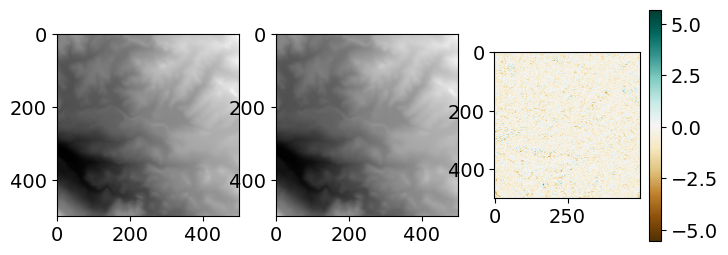

In [38]:
ax = plt.subplot(1,3,1)

# Display the image
ax.imshow(L_gt.ele , cmap='gray')

plt.subplot(1,3,2)
plt.imshow(L_ply.ele, cmap='gray')

plt.subplot(1,3,3)
plt.imshow(L_gt.ele-(L_ply.ele-L_ply.ele[250,250]), cmap='BrBG')
plt.colorbar()

plt.show()

In [39]:
L_ply.assess_equality(L_gt)

self.BODY = {} other.BODY = {} 0 2
self.anchor_point != other.anchor_point
self.ele != other.ele


In [40]:
!$BUILD_DIR/landmark_2_point -landmark gold_standard_data/UTM_WY.lmk -ply output/ply_pointcloud.ply -filetype PLY_LITTLE_ENDIAN -structure POINTCLOUD
!$BUILD_DIR/point_2_landmark -p output/ply_pointcloud.ply -l output/ply_pointcloud.lmk -d 10 -lt 44.550000 -lg -107.440000 -s 5000 -sy 5000 -planet Earth -filetype PLY

Defaulting to WORLD
                 #! LVS Map v3.0
Landmark file saved at output/ply_pointcloud.ply
Defaulting to WORLD
 0.954031313362622 -0.299706945404324  0.000000000000000
 0.210253837878866  0.669282938439506  0.712638528267303
-0.213582716484426 -0.679879471075661  0.701531416280848
Landmark file saved at output/ply_pointcloud.lmk


In [41]:
L_ply = landmark.Landmark("output/ply_pointcloud.lmk")
L_gt = landmark.Landmark("gold_standard_data/UTM_WY.lmk")

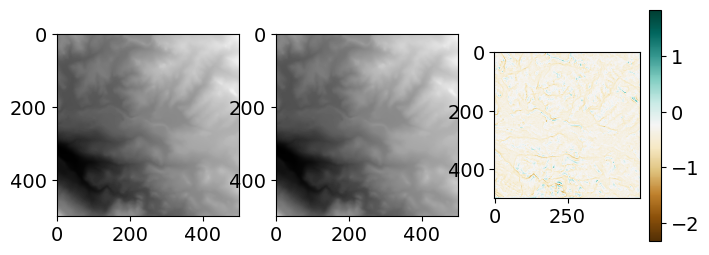

In [42]:
ax = plt.subplot(1,3,1)

# Display the image
ax.imshow(L_gt.ele , cmap='gray')

plt.subplot(1,3,2)
plt.imshow(L_ply.ele, cmap='gray')

plt.subplot(1,3,3)
plt.imshow(L_gt.ele-(L_ply.ele-L_ply.ele[250,250]), cmap='BrBG')
plt.colorbar()

plt.show()

In [43]:
L_ply.assess_equality(L_gt)

self.BODY = {} other.BODY = {} 0 2
self.anchor_point != other.anchor_point
self.ele != other.ele
